In [23]:
import pandas as pd #used to perform data manipulation and analysis
import numpy as np #used to perform a wide variety of mathematical operations on arrays
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string #used to obtain information in the string and manipulate the string overall
import re #used as a regular expression to find particular patterns and process it
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
import warnings #to manipulate warnings details
nltk.download('stopwords')
nltk.download('wordnet')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df = pd.read_csv('TweetSentimentData.csv', encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [25]:
df.columns = ["target","id","date","flag","user","text"]
df

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [27]:
df.sort_values("id", axis = 0,inplace = True, na_position ='last')
df

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
799994,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799995,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799996,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799997,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


In [28]:
# removes pattern in the input text
#This function works to remove certain patterns in the text for preprocessing
def remove_pattern(input_txt, pattern):  
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [29]:
# remove twitter handles (@user)
#"@[\w]*" is the twitter handle pattern to remove in the text for preprocessing
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")


In [30]:
df.head()

,target,id,date,flag,user,text,clean_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew


In [31]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,target,id,date,flag,user,text,clean_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew


In [32]:
# replacing emoji
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[^\w\s]', " ")
df.head()

,target,id,date,flag,user,text,clean_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew


In [33]:
stop_words = nltk.corpus.stopwords.words('english')
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [34]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_stop_words)
df.head()

,target,id,date,flag,user,text,clean_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset can't update Facebook texting it... migh...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times ball. Managed save 50% The ...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, behaving all. i'm mad. here? I can't see t..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew


In [35]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [upset, can't, update, Facebook, texting, it.....
1    [I, dived, many, times, ball., Managed, save, ...
2              [whole, body, feels, itchy, like, fire]
3    [no,, behaving, all., i'm, mad., here?, I, can...
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [36]:
#Stemmer.stem() converts certain words into its simpler version.
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [upset, can't, updat, facebook, text, it..., m...
1    [i, dive, mani, time, ball., manag, save, 50%,...
2               [whole, bodi, feel, itchi, like, fire]
3    [no,, behav, all., i'm, mad., here?, i, can't,...
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [37]:
#Combining the tokenized words into a sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()


,target,id,date,flag,user,text,clean_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset can't updat facebook text it... might cr...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dive mani time ball. manag save 50% the rest...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, behav all. i'm mad. here? i can't see there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew


In [108]:
stop_words = nltk.corpus.stopwords.words('english')


def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z#]', '', text)

    # Remove common punctuation as delimiters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Numerical character removal
    text = re.sub('[0-9]+', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Removing user@ references and #
    text = re.sub(r'\@\w+|\#\w+', '', text)

    # Tokenization (simple split)
    filtered_list = text.split()

        # Stopword removal
    filtered_list = [word for word in filtered_list if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    filtered_list = [lemmatizer.lemmatize(word) for word in filtered_list]
    
    cleaned_text = " ".join(filtered_list)
    
    
    return cleaned_text

dirty_text = "Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com"
cleaned_text = clean_text(dirty_text)

print("Original Text:", dirty_text)
print("Cleaned and Lemmatized Text:", cleaned_text)

Original Text: Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com
Cleaned and Lemmatized Text: hellothisisanexcellentgoodbetterexampletextwithsomespecialcharactersandaurl


In [38]:
#Extraction of the data into vectors for training and testing
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [39]:
X = df['clean_tweet'].values
y = df['target'].values

In [40]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(sublinear_tf=True,ngram_range=(1,2), stop_words = stop_words, strip_accents = 'unicode', max_features = 500000)
X = vector.fit_transform(X)
print(f'Vector fitted.')

Vector fitted.


EDA

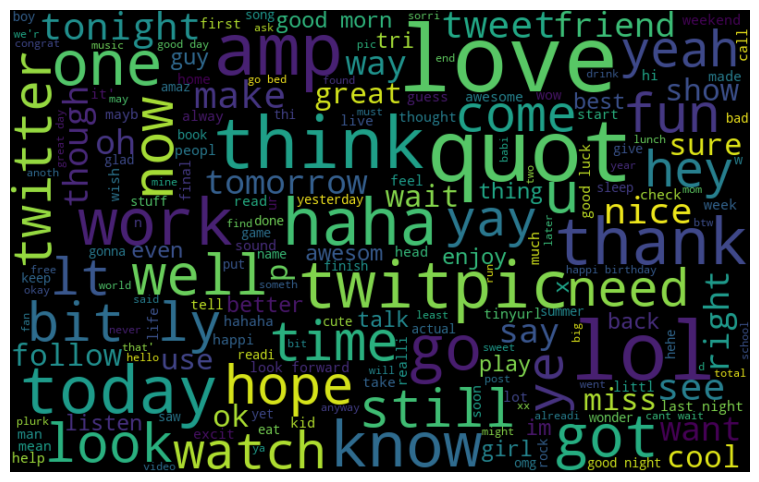

In [41]:
# frequent words visualization for +ve

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['target']==4]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

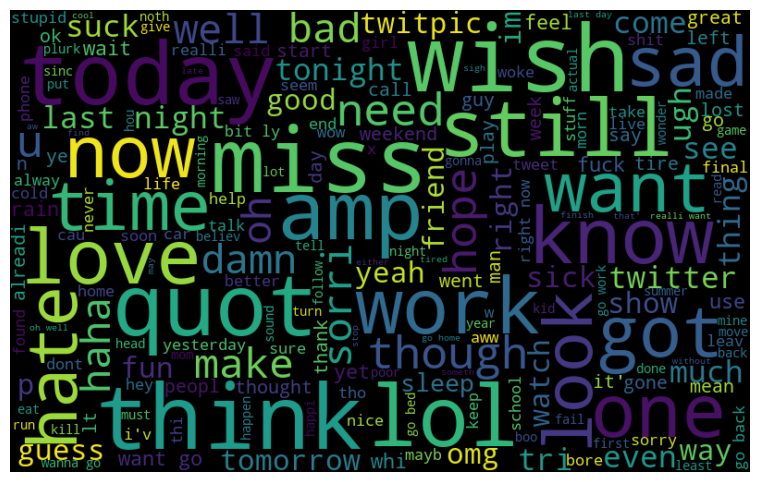

In [42]:
# frequent words visualization for -ve

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['target']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [44]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['target']==4])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['target']==0])

In [45]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, []) 

In [46]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,devun,1
1,alexa,1
2,japan,5
3,skype,3
4,explet,1


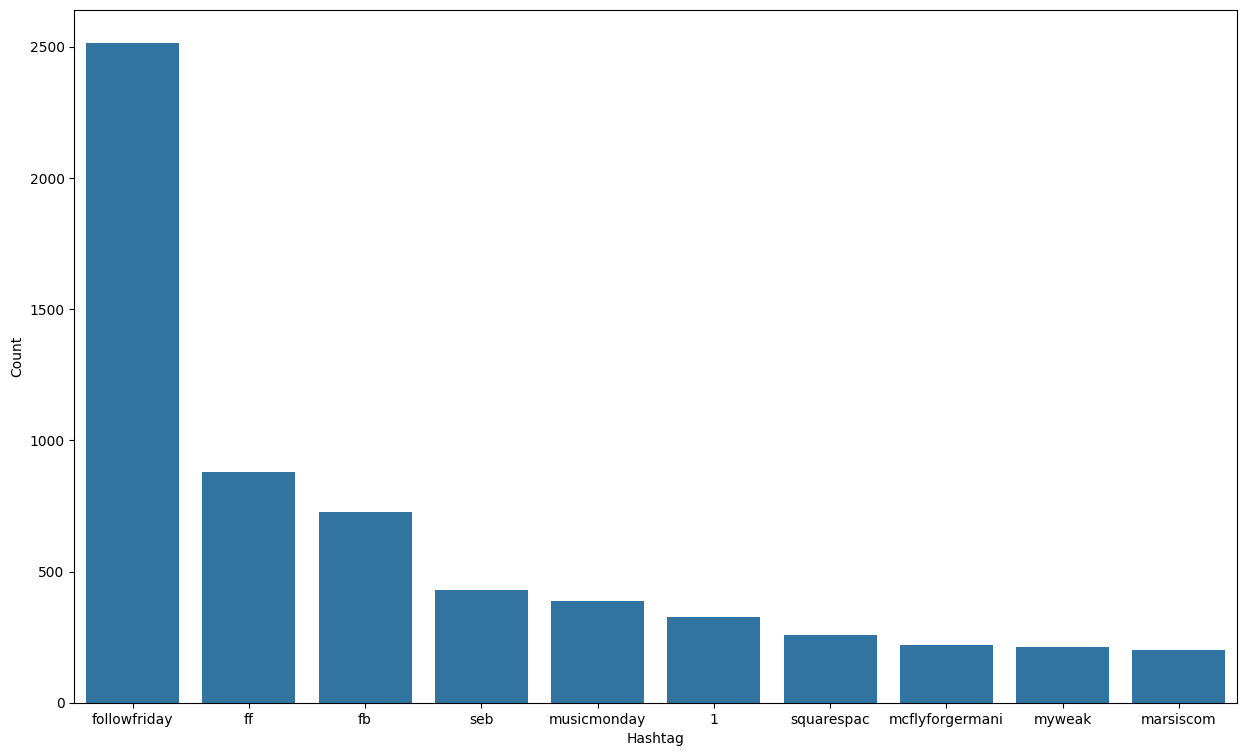

In [47]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [48]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,fb,1059
3,ttsc,1
4,24,11


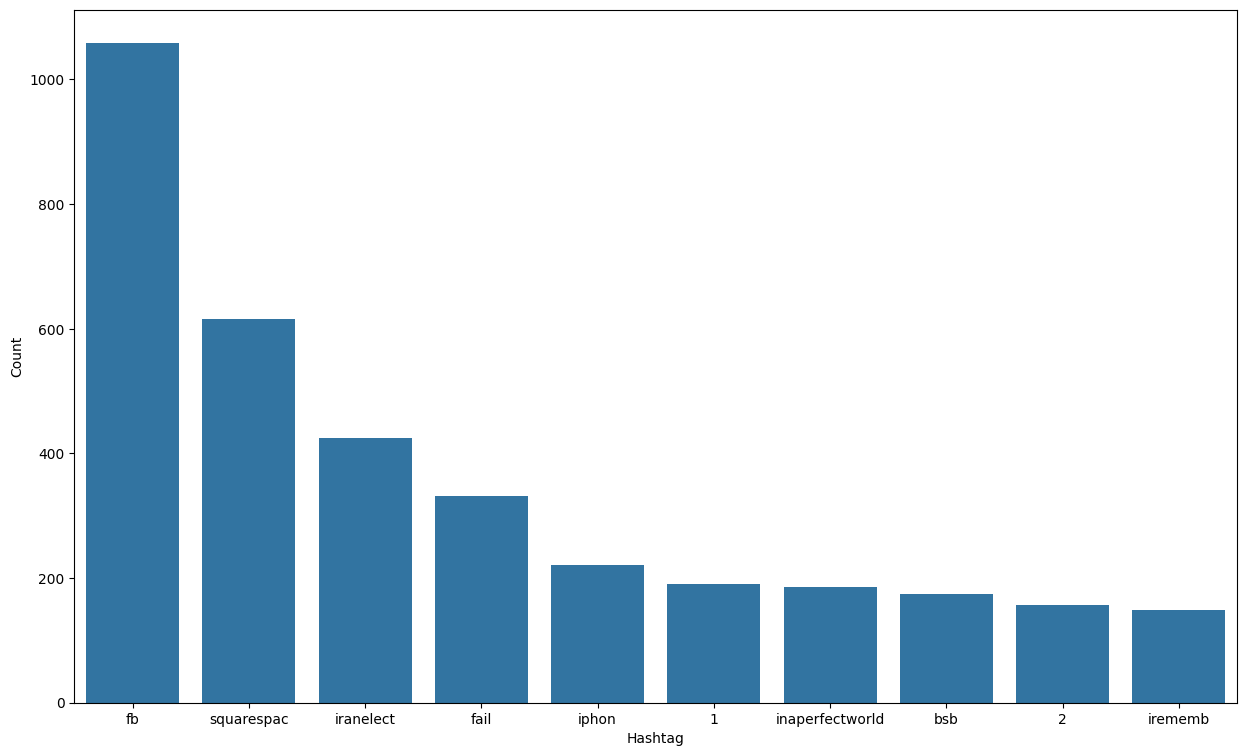

In [49]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.20)

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score


In [54]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("--------------------Training Performance---------------------")
    print(classification_report(y_train,y_pred_tr))
    print("-------------------------------------------------------------")
    print("--------------------Testing Performance----------------------")
    print(classification_report(y_test,y_pred))

In [55]:
model = MultinomialNB()
model_train(model, x_train, x_test, y_train, y_test)

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.82    639717
           4       0.82      0.83      0.83    640282

    accuracy                           0.83   1279999
   macro avg       0.83      0.83      0.83   1279999
weighted avg       0.83      0.83      0.83   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.78      0.77      0.77    160282
           4       0.77      0.78      0.77    159718

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [56]:
model = LogisticRegression()
model_train(model, x_train, x_test, y_train, y_test)

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.81    639717
           4       0.81      0.83      0.82    640282

    accuracy                           0.82   1279999
   macro avg       0.82      0.82      0.82   1279999
weighted avg       0.82      0.82      0.82   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.80      0.77      0.79    160282
           4       0.78      0.81      0.79    159718

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [57]:
model = RandomForestClassifier(n_estimators=100,max_depth=15,max_features='sqrt')
model_train(model, x_train, x_test, y_train, y_test)

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.75      0.65      0.70    639717
           4       0.69      0.79      0.74    640282

    accuracy                           0.72   1279999
   macro avg       0.72      0.72      0.72   1279999
weighted avg       0.72      0.72      0.72   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.75      0.64      0.69    160282
           4       0.69      0.78      0.73    159718

    accuracy                           0.71    320000
   macro avg       0.72      0.71      0.71    320000
weighted avg       0.72      0.71      0.71    320000



In [66]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [67]:
pred = LR.predict(x_test)
accuracy_score(y_test,pred)

0.789171875

In [69]:
f1_score(y_test, pred, pos_label=4)

0.7928596210588369

In [94]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 4
pred = pred.astype(np.int64)

f1_score(y_test, pred,average="micro")

0.50088125

In [33]:
'''from sklearn.model_selection import cross_val_score
for solver in ['lbfgs', 'sag', 'saga']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for penalty in ['l2']:
            model = LogisticRegression(C=C, penalty=penalty, solver=solver)
            scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='f1_macro')
            mean_score = scores.mean()
            print(f"C={C}, solver={solver}, penalty={penalty}, F1-macro={mean_score:.4f}")
    print()'''


C=0.001, solver=lbfgs, penalty=l2, F1-macro=0.7298
C=0.01, solver=lbfgs, penalty=l2, F1-macro=0.7513
C=0.1, solver=lbfgs, penalty=l2, F1-macro=0.7754
C=1, solver=lbfgs, penalty=l2, F1-macro=0.7877
C=10, solver=lbfgs, penalty=l2, F1-macro=0.7827
C=100, solver=lbfgs, penalty=l2, F1-macro=0.7820

C=0.001, solver=sag, penalty=l2, F1-macro=0.7301
C=0.01, solver=sag, penalty=l2, F1-macro=0.7521
C=0.1, solver=sag, penalty=l2, F1-macro=0.7759
C=1, solver=sag, penalty=l2, F1-macro=0.7890
C=10, solver=sag, penalty=l2, F1-macro=0.7741
C=100, solver=sag, penalty=l2, F1-macro=0.7390

C=0.001, solver=saga, penalty=l2, F1-macro=0.7301
C=0.01, solver=saga, penalty=l2, F1-macro=0.7521
C=0.1, solver=saga, penalty=l2, F1-macro=0.7759
C=1, solver=saga, penalty=l2, F1-macro=0.7890
C=10, solver=saga, penalty=l2, F1-macro=0.7741
C=100, solver=saga, penalty=l2, F1-macro=0.7416



In [34]:
'''from sklearn.model_selection import cross_val_score
for solver in ['lbfgs', 'sag', 'saga']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for penalty in ['l2']:
            model = LogisticRegression(C=C, penalty=penalty, solver=solver)
            scores = cross_val_score(model, x_test, y_test, cv=kfold, scoring='f1_macro')
            mean_score = scores.mean()
            print(f"C={C}, solver={solver}, penalty={penalty}, F1-macro={mean_score:.4f}")
    print()'''



C=0.001, solver=lbfgs, penalty=l2, F1-macro=0.7116
C=0.01, solver=lbfgs, penalty=l2, F1-macro=0.7368
C=0.1, solver=lbfgs, penalty=l2, F1-macro=0.7607
C=1, solver=lbfgs, penalty=l2, F1-macro=0.7761
C=10, solver=lbfgs, penalty=l2, F1-macro=0.7639
C=100, solver=lbfgs, penalty=l2, F1-macro=0.7417

C=0.001, solver=sag, penalty=l2, F1-macro=0.7105
C=0.01, solver=sag, penalty=l2, F1-macro=0.7372
C=0.1, solver=sag, penalty=l2, F1-macro=0.7610
C=1, solver=sag, penalty=l2, F1-macro=0.7760
C=10, solver=sag, penalty=l2, F1-macro=0.7635
C=100, solver=sag, penalty=l2, F1-macro=0.7312

C=0.001, solver=saga, penalty=l2, F1-macro=0.7112
C=0.01, solver=saga, penalty=l2, F1-macro=0.7372
C=0.1, solver=saga, penalty=l2, F1-macro=0.7610
C=1, solver=saga, penalty=l2, F1-macro=0.7760
C=10, solver=saga, penalty=l2, F1-macro=0.7635
C=100, solver=saga, penalty=l2, F1-macro=0.7336



In [96]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(LR, file)
file.close()

In [97]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    LR = pickle.load(file)
    file.close()
    return vectoriser, LR

In [100]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,4], ["Negative","Positive"])
    return df

In [ ]:
new_tweet = 'This is a bad product'
cleaned_new_tweet = clean_text(new_tweet)
vect_tweet = vector.transform([cleaned_new_tweet])
prediction = LR.predict(vect_tweet)
print('Predicted Sentiment for the new tweet:', 'Positive' if prediction[0] == 1 else 'Negative')

In [101]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()
    
    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]
    
    df = predict(vectoriser, lg, text)
    print(df.head())

AttributeError: 'list' object has no attribute 'lower'